In [ ]:
!pip install pykrx

In [2]:
import pykrx
#help(pykrx)

In [93]:
# 1. 데이터 소개
from pykrx import stock

# bond도 가능함
# from pykrx import bond

# https://github.com/sharebook-kr/pykrx

# tickers = stock.get_market_ticker_list(조회일자(YYYYmmdd) [,market=조회할 시장(KOSPI, KOSDAQ, ALL])
# name = get_market_ticker_name(심볼 [,market=조회할 시장(KOSPI, KOSDAQ, ALL])
# ohlcv = stock.stock.get_market_ohlcv(조회일자(YYYYmmdd) [,앞에 시작일을 넣었다면 종료일] [,심볼] )

# 예시
#tickers = stock.get_market_ticker_list("20220222", market="KOSPI") # 코스피 종목 리스트
#name = stock.get_market_ticker_name("005930") # 심볼 -> 기업 이름
#ohlcv = stock.get_market_ohlcv("20220222", market="KOSPI") # 특정일 코스피 종목들의 OHLCV
raw = stock.get_market_ohlcv("20170101", "20221231", "005930") # 특정기간 특정 종목의 OHLCV

In [94]:
raw.tail()

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2022-12-23,58200,58400,57700,58100,9829407,570401785680,-1.69
2022-12-26,58000,58100,57700,57900,6756411,391223170600,-0.34
2022-12-27,58000,58400,57900,58100,10667027,620410096800,0.35
2022-12-28,57600,57600,56400,56600,14665410,832919426100,-2.58
2022-12-29,56000,56200,55300,55300,11295935,628653753150,-2.30


In [95]:
# 2. 수익률 계산하기
import pandas as pd
df = pd.DataFrame(raw['종가'])

In [96]:
df = df.rename(columns={'종가':'close'})
df.head()

,close
날짜,
2017-01-02,36100
2017-01-03,36480
2017-01-04,36160
2017-01-05,35560
2017-01-06,36200


In [97]:
import numpy as np

In [98]:
df['return']=np.log(df['close']/df['close'].shift(1))
df.tail()

,close,return
날짜,,
2022-12-23,58100,-0.017065
2022-12-26,57900,-0.003448
2022-12-27,58100,0.003448
2022-12-28,56600,-0.026157
2022-12-29,55300,-0.023236


In [99]:
# 3. 12월 29일 종가를 기준으로 향후 251일 이후의 수익률 부트스트래핑
expect = np.random.choice(df['return'], size=251) # 무작위 임의표본 추출하기 (return값에서 251개 무작위 추출)
expect

array([ 0.02379833, -0.02360987,  0.01795967,  0.01618873,  0.0010923 ,
        0.0080451 , -0.00812352,  0.01106342, -0.01892801,  0.0051613 ,
        0.01804173,  0.00286123,  0.00568183, -0.00242424,  0.01003773,
        0.00509772, -0.00158353, -0.04978404, -0.0060332 ,  0.02126   ,
        0.02266048,  0.00736923,  0.00260078, -0.00856536,  0.00247832,
        0.01030347,  0.01776246,  0.00292398, -0.00969705, -0.01154747,
       -0.01812738, -0.02252106,  0.04004985, -0.0082305 , -0.01968568,
        0.0102355 ,  0.00977206,  0.02325686,  0.01975373, -0.00140154,
        0.00568183, -0.00108284, -0.02076199, -0.01607951,  0.00347223,
        0.03190063,  0.01574836,  0.05547546,  0.        ,  0.01517096,
       -0.00716849, -0.03088347, -0.00998344,  0.01374163,  0.00183318,
        0.        , -0.00700528,  0.00284091, -0.01016384,  0.        ,
       -0.02437164,  0.0051613 ,  0.00134318, -0.02385122, -0.01722325,
        0.01184614, -0.0064809 , -0.007732  , -0.03723835, -0.01

In [100]:
# 4. 각 행의 값을 직전의 종가에 곱하여 251일의 예측 종가를 만들기

# 기준일의 종가
base_price = df['close'].iloc[-1]   # 가장 마지막 행의 close 값을 기준일의 종가로 가져옵니다.

# 예상 수익률을 이용하여 예상 종가 계산
expected_price = base_price * (1 + expect).cumprod()

print(expected_price)

[56616.04762434 55279.35034691 56272.14903785 57183.12351602
 57245.58460745 57706.13081315 57237.35381756 57870.59467645
 56775.21948833 57068.25352975 58097.86335092 58264.094833
 58595.14171697 58453.092819   59039.82891546 59340.79725923
 59246.82923126 56297.2829887  55957.6301757  57147.28936117
 58442.27440631 58872.94897436 59026.06466268 58520.48500071
 58665.51725587 59269.97555731 60322.75591041 60499.1383633
 59912.47545481 59220.6377966  58147.12251944 56837.58773803
 59113.92439216 58627.38728849 57473.26759207 58061.53544631
 58628.91652923 59992.44115979 61177.51556869 61091.77271573
 61438.88599453 61372.35768701 60098.14532154 59131.79687086
 59337.11581628 61230.0072921  62194.2793041  65644.53534746
 65644.53534746 66640.42603359 66162.71484072 64119.38050832
 63479.24826471 64351.55647071 64469.52452661 64469.52452661
 64017.89728896 64199.76643767 63547.25048964 63547.25048964
 61998.49997971 62318.49294803 62402.1981224  60913.8298272
 59864.69595231 60573.861551

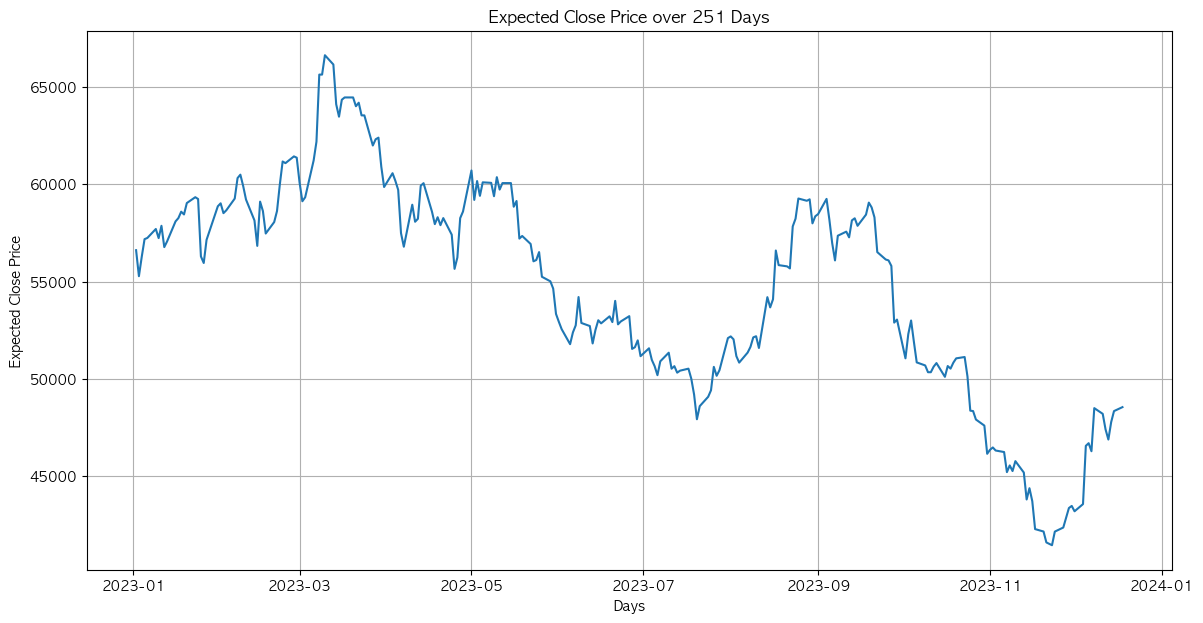

In [101]:
# 5. 251일의 주가 흐름을 line plot으로 그려보기

# plot을 위한 라이브러리 import
import matplotlib.pyplot as plt

date = pd.bdate_range('1/1/2023', periods=251)

# line plot을 생성합니다.
plt.figure(figsize=(14,7))
plt.plot(date, expected_price)

# x축과 y축에 레이블을 추가합니다.
plt.xlabel('Days')
plt.ylabel('Expected Close Price')

# 그래프 제목을 추가합니다.
plt.title('Expected Close Price over 251 Days')

# grid를 추가합니다.
plt.grid(True)

# 그래프를 표시합니다.
plt.show()

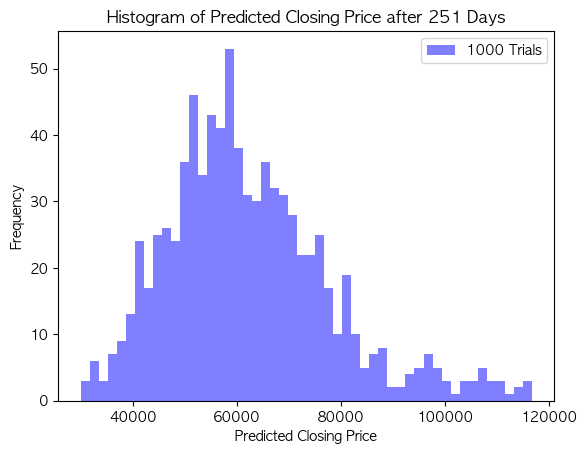

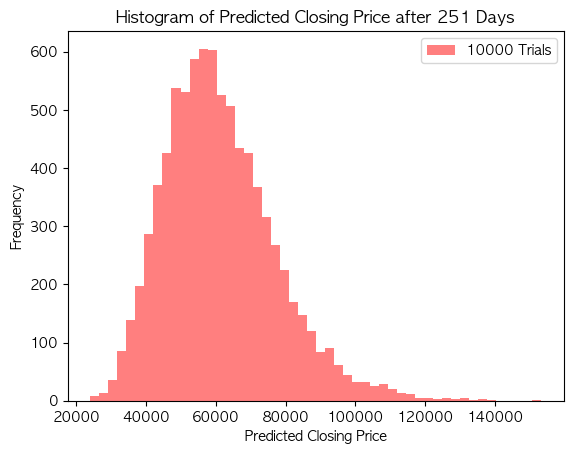

In [102]:
# 6. 해당 시행을 1000번, 10000번 반복하여 251일째 (즉, 대략적인 영업일 기준 2023년 12월 31일)의 예측 종가를 히스토그램으로 그려보기

import numpy as np
import matplotlib.pyplot as plt

num_simulations = [1000, 10000]

returns = df['close'].pct_change() 

for num_simulation in num_simulations:
    final_prices = [] 

    for _ in range(num_simulation):
        expect = np.random.choice(returns, size=251) 
        expect_close = df['close'].iloc[-1] * (1 + expect).cumprod() 
        
        final_price = expect_close[-1] 
        final_prices.append(final_price) 
        
    if num_simulation == 1000: col = 'blue' 
    else: col = 'red'
  
    plt.hist(final_prices, bins=50, alpha=0.5, label=f'{num_simulation} Trials',color = col)
    plt.xlabel('Predicted Closing Price')
    plt.ylabel('Frequency')
    plt.title('Histogram of Predicted Closing Price after 251 Days')
    plt.legend()
    plt.show()

In [103]:
# 기타 지표 수집법 (다만, 이 지표는 아직까지 검증이 좀 필요함)
fs = stock.get_market_fundamental("20220101", "20221231", "005930")
fs.tail()
# BPS: Book value Per Share : 주당순자산
# PER: Price Earning Ratio : 주가수익비율
# PBR: Price on Book-value Ratio : 주가순자산비율
# EPS: Earning Per Share : 주당순이익
# DIV: Dividend : 배당수익률
# DPS: Dividend Per Share : 주당배당금

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2022-12-23,43611,10.06,1.33,5777,2.49,1444
2022-12-26,43611,10.02,1.33,5777,2.49,1444
2022-12-27,43611,10.06,1.33,5777,2.49,1444
2022-12-28,43611,9.80,1.30,5777,2.55,1444
2022-12-29,43611,9.57,1.27,5777,2.61,1444


In [104]:
# 
df = stock.get_market_trading_value_by_date("20220101", "20221231", "005930", on="매수")
df.tail()

,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2022-12-23,290882199900,2131952700,151913902300,125473730780,570401785680
2022-12-26,286683812200,2009783800,81385247900,21144326700,391223170600
2022-12-27,458517755800,9091061300,114233546300,38567733400,620410096800
2022-12-28,309929330200,9289633700,398124806000,115575656200,832919426100
2022-12-29,212157200600,2227444100,271035768100,143233340350,628653753150


In [107]:
# 기타 국내외 주식정보 수집
import FinanceDataReader as fdr

# fdr.DataReader(주식 종목 [, 시작일(YYYY-mm-dd)] [,종료일(YYYY-mm-dd)])
# fdr.StockListing(거래소이름("SSE", "SZSE", ...))

samsung = fdr.DataReader("005930")
samsung_period = fdr.DataReader("005930", "2022-01-01", "2022-12-31")
samsung_year = fdr.DataReader("005930", "2021")

# 뉴욕거래소 전체
NYSE_df = fdr.StockListing('NYSE') 

100%|██████████████████████████████████████| 3102/3102 [00:06<00:00, 496.88it/s]


In [108]:
NYSE_df.tail()

,Symbol,Name,Industry,IndustryCode
3097,RSF RT WI,RiverNorth Capital and Income Fund Rights Exp ...,폐쇄형 펀드,55501030
3098,VTS WI,Vitesse Energy Inc,"오일, 가스 탐사 및 생산",50102020
3099,KIO RT WI,KKR Income Opportunities Rights Exp 16th Feb 2...,폐쇄형 펀드,55501030
3100,IGR RT WI,CBRE Global Real Estate Income Rights When Iss...,폐쇄형 펀드,55501030
3101,KNF WI,Knife River Corp,건설 자재,51202010


In [109]:
samsung_period.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205


In [114]:
# yahoo finance 사용 - 해외특화
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
# yf의 메소드를 재정의해줌(이 부분이 필요!)

# df = pdr.get_data_yahoo(주식 종목(한국주식의 경우 ".KS") [, 시작일(YYYY-mm-dd)] [,종료일(YYYY-mm-dd)])

# 예시
df = pdr.get_data_yahoo("AAPL", "2022-01-01", "2022-12-31")

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434296,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144302,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405685,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510956,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679459,86709100
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674026,85438400
